<a href="https://colab.research.google.com/github/dsaint31x/OpenCV_Python_Tutorial/blob/master/DIP/2021/%EC%9D%B4%EA%B0%80%EC%9D%80/211001_DIP_01_02_ArithmeticOperations_on_Images_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


uint8


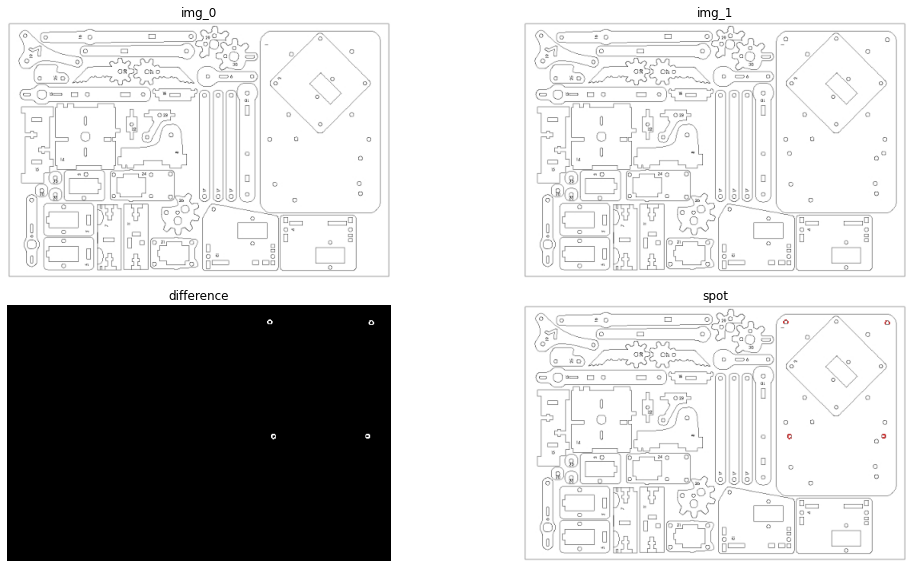

In [2]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

path = '/content/drive/MyDrive/가은/2021/영상처리/images'
fstr_0 = os.path.join(path,'robot_arm0.jpg')
fstr_1 = os.path.join(path,'robot_arm1.jpg')
img_0 = cv2.imread(fstr_0, cv2.IMREAD_GRAYSCALE)
img_1 = cv2.imread(fstr_1, cv2.IMREAD_GRAYSCALE)
img_0_color = cv2.imread(fstr_0)
img_1_color = cv2.imread(fstr_1)

# absdiff는 차 영상에 절대값
diff = cv2.absdiff(img_0, img_1)

diff[diff>=10] = 255
print(diff.dtype)
diff_red = cv2.cvtColor(diff,cv2.COLOR_GRAY2BGR)
diff_red[:,:,2] = 0

spot = cv2.bitwise_xor(img_1_color,diff_red)    # 달라야 0 나옴

imgs = {'img_0':img_0_color, 'img_1':img_1_color, 'difference':diff,'spot':spot}

plt.figure(figsize=[16,8])
for idx, (title, img) in enumerate(imgs.items()):
  plt.subplot(2,2,idx+1)
  plt.title(title)
  plt.axis('off')
  if img.ndim >2: 
    plt.imshow(img[:,:,::-1])
  else:
    plt.imshow(img,cmap=plt.cm.gray)
plt.tight_layout()
plt.show()

# OpenCV



*  cv2.IMREAD_COLOR : 별도로 지정하지 않을 경우 사용되는 기본값이며 칼라 이미지로 읽어드림. 이미지의 투명도값은 무시된다.
* cv2.IMREAD_GRAYSCALE : 이미지를 Grayscale로 읽는다
* cv2.IMREAD_UNCHANGED : 투명도인 Alpha 채널을 포함하여 읽는다.

---


* #### openCV는 BGR로 사용하지만, Matplotlib는 RGB로 이미지를 보여주기 때문입니다.
* 즉 결과 값은 3차원 배열의 값중 첫번째와 세번째 배열값을 서로 바꿔 주여야 합니다.



# 영상처리
## github의 흉부 x-ray사진에서 roi를 마스크로 잘라내는 처리 수행하는 프로그램 작성하여 
## 소스 및 보고서 제출.
 * 사진을 원하는 모양을 잡아 그 부분만 segmentation 해보자.
 * 사진을 이진화시킨 후, 경계면을 다듬어 마스크를 만들어 낸 후, 이를 사진에 다시 적용시켜 그 부위를 오려내고자 한다.

### VER_1 )

In [116]:
# 1. 그림 불러오기
fstr_0 = os.path.join(path,'Lung.jpg')
fstr_1 = os.path.join(path,'Lung_mask.png')

# 2. 그림 gray 로 읽기
img  = cv2.imread(fstr_0,cv2.IMREAD_GRAYSCALE)
mask = cv2.imread(fstr_1,cv2.IMREAD_GRAYSCALE) 

(279, 283)
(279, 283)


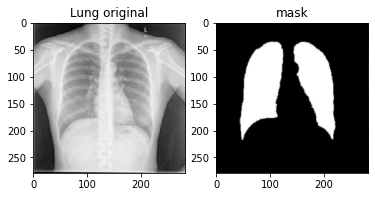

In [117]:
# 3. Lung 와 mask
plt.figure()
plt.subplot(121), plt.imshow(img,cmap=plt.cm.gray), plt.title("Lung original")
plt.subplot(122), plt.imshow(mask,cmap=plt.cm.gray), plt.title("mask")

print(img.shape)
print(mask.shape)

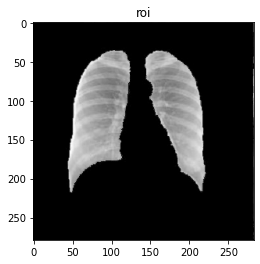

In [22]:
# 4. Mask의 roi 지정
masked_roi = cv2.bitwise_and(img,mask)    # and.. 둘다 1 

plt.figure(), plt.title("roi"), plt.imshow(masked_roi,cmap=plt.cm.gray)
plt.show()

### VER_2 )


#### cv2.imread()
*   이미지 파일을 읽습니다. 이미지 파일의 경로는 절대/상대경로가 가능합니다.


In [23]:
# 1. 그림 불러오기
fstr_0 = os.path.join(path,'Lung.jpg')

# 2. 그림 gray 로 읽기
img  = cv2.imread(fstr_0,cv2.IMREAD_GRAYSCALE)

#### cv2.imshow()
*  이미지를 사이즈에 맞게 보여줍니다.

(<matplotlib.image.AxesImage at 0x7fecaed7b0d0>,
 Text(0.5, 1.0, 'Lung original'))

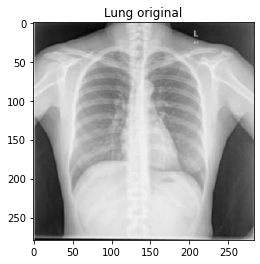

In [66]:
plt.imshow(img,cmap=plt.cm.gray), plt.title("Lung original")

#### cv2.threshold
* _, mask = cv2.threshold(원본이미지, 임계값, 임계값 이상일 경우 바꿀 최대값(보통 흰색 255 지정), THRESH_BINARY(픽셀값이 임계값보다 클 경우 최대값, 최대값이 임계값보다 작을 경우 0(검은색) 이진화)

In [118]:
_, mask = cv2.threshold(mask,254,255,cv2.THRESH_BINARY)

#### mask
*   마스크 영상은 픽셀 값이 0이 아닌 위치에서만 연산이 수행됨
*   보통 마스크 영상으로는 0 또는 255로 구성된 이진 영상을 사용



(<matplotlib.image.AxesImage at 0x7fec9ac49890>, Text(0.5, 1.0, 'mask'))

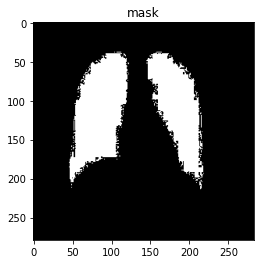

In [120]:
 plt.imshow(mask,cmap=plt.cm.gray), plt.title("mask")

In [69]:
mask = (mask*1).astype('uint8') # cv2의 기본 데이터타입은 'uint8'이므로 바꿔준다.

In [121]:
masked = cv2.bitwise_or(img,mask)     # 0 이나 1
masked1 = cv2.bitwise_and(img,mask)   # 1 만

(<matplotlib.axes._subplots.AxesSubplot at 0x7fec9b0180d0>,
 Text(0.5, 1.0, 'masked-gray'))

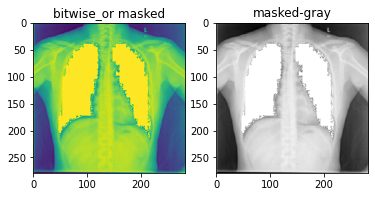

In [123]:
plt.subplot(121), plt.imshow(masked), plt.title("bitwise_or masked")
plt.subplot(122), plt.imshow(masked, cmap='gray') ,  plt.title("masked-gray")

(<matplotlib.axes._subplots.AxesSubplot at 0x7fec9ab0a910>,
 Text(0.5, 1.0, 'masked1-gray'))

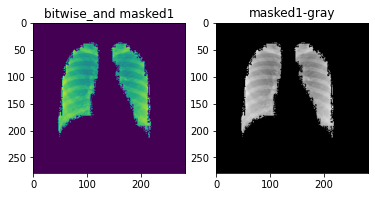

In [124]:
plt.subplot(121), plt.imshow(masked1), plt.title("bitwise_and masked1")
plt.subplot(122), plt.imshow(masked1, cmap='gray') ,  plt.title("masked1-gray")

(279, 283)
(279, 283)


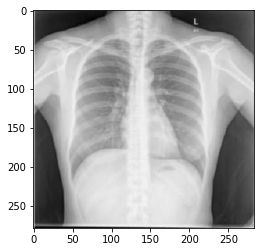

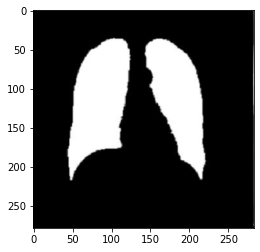

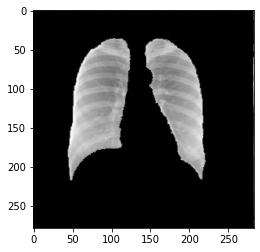

In [25]:
fstr_0 = os.path.join(path,'Lung.jpg')
fstr_1 = os.path.join(path,'Lung_mask.png')
img  = cv2.imread(fstr_0,cv2.IMREAD_GRAYSCALE)
mask = cv2.imread(fstr_1,cv2.IMREAD_GRAYSCALE) 

plt.figure()
plt.imshow(img,cmap=plt.cm.gray)
plt.figure()
plt.imshow(mask,cmap=plt.cm.gray)
print(img.shape)
print(mask.shape)

#_, mask = cv2.threshold(mask,254,255,cv2.THRESH_BINARY)
masked_roi = cv2.bitwise_and(img,mask)


plt.figure()
plt.imshow(masked_roi,cmap=plt.cm.gray)
plt.show()

(279, 850, 3)
5


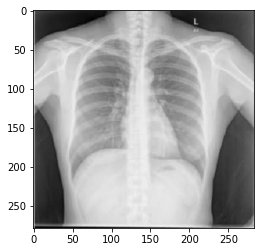

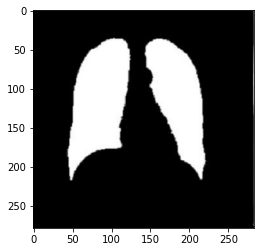

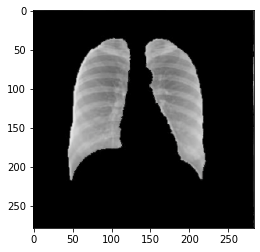

True

In [5]:
fstr_0 = os.path.join(path,'Lung-ROI-segmentation.png')
img = cv2.imread(fstr_0)
print(img.shape)
l = np.hsplit(img,(283,284,567,568))    # 선이라 생각하고 자름!
print(len(l))
plt.figure()
plt.imshow(l[0])
plt.figure()
plt.imshow(l[2])
plt.figure()
plt.imshow(cv2.bitwise_and(l[0],l[2]))    # and.. 둘다 1 
plt.show()
fstr_0 = os.path.join(path,'Lung.jpg')
cv2.imwrite(fstr_0, cv2.cvtColor(l[0],cv2.COLOR_BGR2GRAY))


g = cv2.cvtColor(l[2],cv2.COLOR_BGR2GRAY)
_, gb = cv2.threshold(g,1,255,cv2.THRESH_BINARY)
mask = cv2.cvtColor(g,cv2.COLOR_GRAY2BGR)

fstr_0 = os.path.join(path,'Lung_mask.png')
cv2.imwrite(fstr_0,l[2])


In [ ]:
import cv2
import numpy as np

src = cv2.imread('/content/drive/MyDrive/가은/2021/영상처리/images/sign.JPG', cv2.IMREAD_UNCHANGED)

bgr = src[:,:,:3] # Channels 0..2
gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)

# Some sort of processing...

bgr = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
alpha = src[:,:,2] # Channel 3
result = np.dstack([bgr, alpha]) # Add the alpha channel

cv2.imwrite('/content/drive/MyDrive/가은/2021/영상처리/images/sign_result.png', result)

True

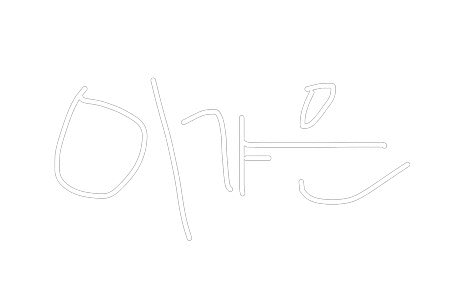

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/가은/2021/영상처리/images/sign_result.png')


[[[54 45 36]
  [54 45 36]
  [54 45 36]
  ...
  [54 45 36]
  [54 45 36]
  [54 45 36]]

 [[19 10  1]
  [19 10  1]
  [19 10  1]
  ...
  [19 10  1]
  [19 10  1]
  [19 10  1]]

 [[14  5  0]
  [14  5  0]
  [14  5  0]
  ...
  [14  5  0]
  [14  5  0]
  [14  5  0]]

 ...

 [[30 15  0]
  [30 15  0]
  [30 15  0]
  ...
  [30 15  0]
  [30 15  0]
  [30 15  0]]

 [[30 15  0]
  [30 15  0]
  [30 15  0]
  ...
  [30 15  0]
  [30 15  0]
  [30 15  0]]

 [[30 15  0]
  [30 15  0]
  [30 15  0]
  ...
  [30 15  0]
  [30 15  0]
  [30 15  0]]]
(180, 270, 3)
(180, 270, 3)


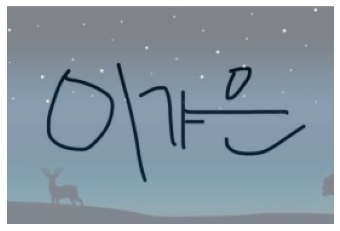

In [ ]:
import os

colab_path = '/content/drive/MyDrive/가은/2021/영상처리/images/'
fstr_0 = os.path.join(colab_path,'sign_result.png')
fstr_1 = os.path.join(colab_path,'univers.jpg')

img_0 = cv2.imread(fstr_0)
img_1 = cv2.imread(fstr_1)
print(img_1)
img_0 = cv2.resize(img_0, dsize=(img_1.shape[1],img_1.shape[0]), interpolation= cv2.INTER_AREA)
print(img_0.shape)
print(img_1.shape)

dst = cv2.addWeighted(img_0,0.5, img_1,0.5,0)


plt.imshow(dst[:,:,::-1])
plt.axis('off')
plt.show()

# cv2.imshow('dst',dst)
# cv2.waitKey(0)
# cv2.destroyWindow('dst')

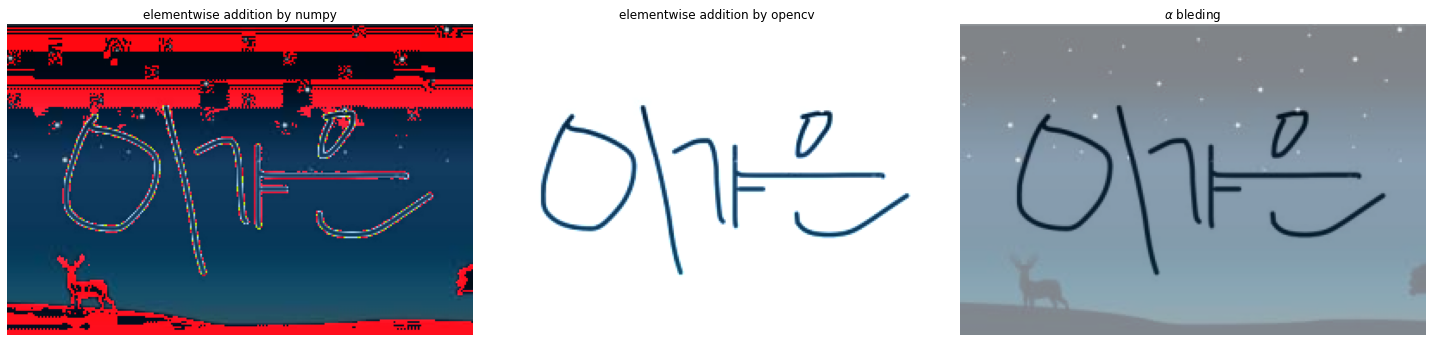

In [ ]:
ret_0 = img_0+img_1
ret_1 = cv2.add(img_0, img_1)

plt.figure(figsize=(20,40))
plt.subplot(1,3,1)
plt.gca().set_title('elementwise addition by numpy')
plt.imshow(ret_0[:,:,::-1])
plt.gca().axis('off')
plt.subplot(1,3,2)
plt.gca().set_title('elementwise addition by opencv')
plt.imshow(ret_1[:,:,::-1])
plt.gca().axis('off')
plt.subplot(1,3,3)
plt.gca().set_title(r'$\alpha$ bleding')
plt.imshow(dst[:,:,::-1])
plt.gca().axis('off')

plt.tight_layout()
plt.show()